In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from keras.layers.core import Dense
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/MLP- Car Sales Forecast/sales-cars_MLP.csv')

In [9]:
df.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [10]:
df.index = pd.to_datetime(df.Month, format='%Y-%m')

In [11]:
df

,Month,Sales
Month,,
2016-01-01,2016-01,266
2016-02-01,2016-02,146
2016-03-01,2016-03,183
2016-04-01,2016-04,119
2016-05-01,2016-05,180
2016-06-01,2016-06,169
2016-07-01,2016-07,232
2016-08-01,2016-08,225
2016-09-01,2016-09,193


In [12]:
df = df.resample('M').sum()

In [13]:
df

,Sales
Month,
2016-01-31,266
2016-02-29,146
2016-03-31,183
2016-04-30,119
2016-05-31,180
2016-06-30,169
2016-07-31,232
2016-08-31,225
2016-09-30,193


In [14]:
df.head()

,Sales
Month,
2016-01-31,266
2016-02-29,146
2016-03-31,183
2016-04-30,119
2016-05-31,180


<Axes: xlabel='Month'>

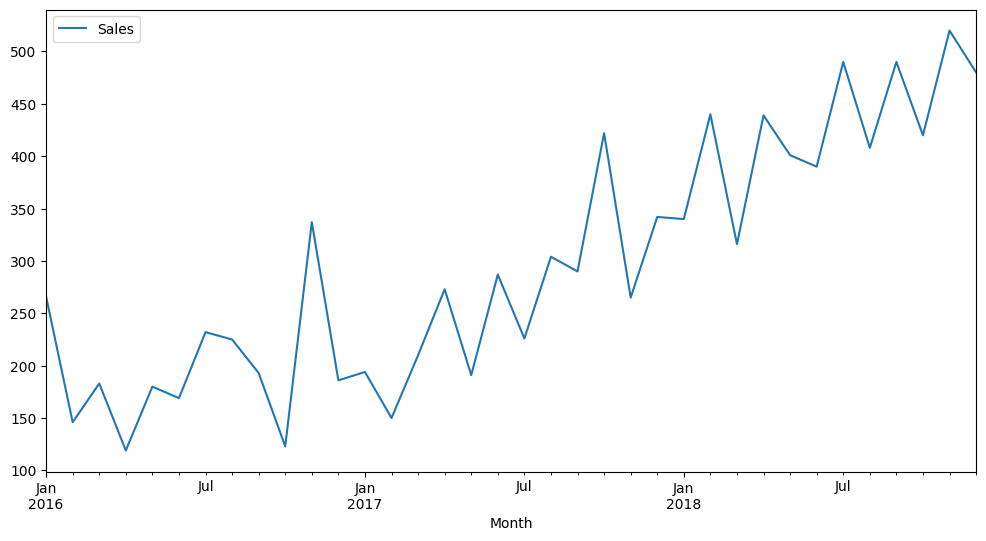

In [15]:
df.plot(figsize=(12,6))

In [ ]:
#Seasonal Decompose

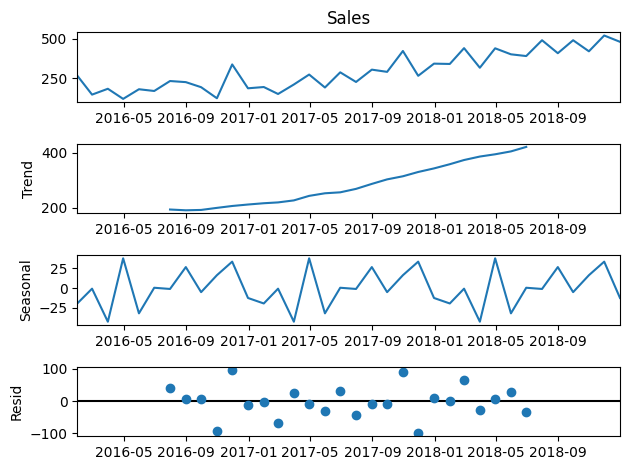

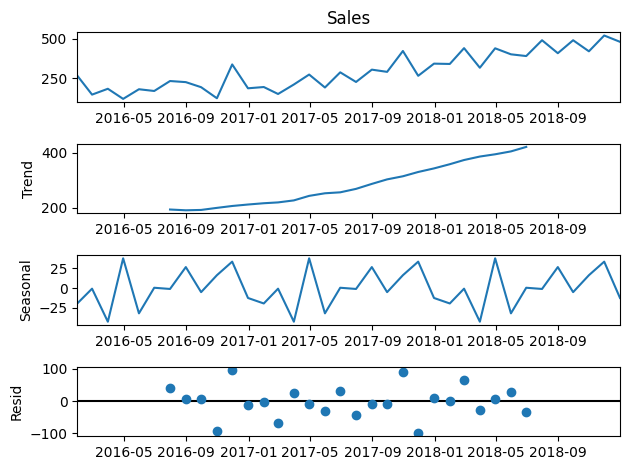

In [18]:
results = seasonal_decompose(df['Sales'])
results.plot()

The purpose of the tutorial is to predict the sales for the future but we do not have the data to evaluate the accuracy of the prediction. Hence, we are setting aside the last 6 months of the existing data to be used for evaluation.

In [20]:
#Train Test Split
train = df[:-6]
test = df[-6:]

In [21]:
train.head()

,Sales
Month,
2016-01-31,266
2016-02-29,146
2016-03-31,183
2016-04-30,119
2016-05-31,180


In [22]:
test.head()

,Sales
Month,
2018-07-31,490
2018-08-31,408
2018-09-30,490
2018-10-31,420
2018-11-30,520


Generate Lags

In [23]:
def generate_lag(df, n):
  X, y = [], []
  for i in range(len(df)-n):
    X.append(df[i:i+n])
    y.append(df[n+i])
  return np.array(X), np.array(y), np.array(y[-n:]).reshape(1,n)

In [24]:
X, y, last_batch_values = generate_lag(train.Sales.values, 12)

In [25]:
X

array([[266, 146, 183, 119, 180, 169, 232, 225, 193, 123, 337, 186],
       [146, 183, 119, 180, 169, 232, 225, 193, 123, 337, 186, 194],
       [183, 119, 180, 169, 232, 225, 193, 123, 337, 186, 194, 150],
       [119, 180, 169, 232, 225, 193, 123, 337, 186, 194, 150, 210],
       [180, 169, 232, 225, 193, 123, 337, 186, 194, 150, 210, 273],
       [169, 232, 225, 193, 123, 337, 186, 194, 150, 210, 273, 191],
       [232, 225, 193, 123, 337, 186, 194, 150, 210, 273, 191, 287],
       [225, 193, 123, 337, 186, 194, 150, 210, 273, 191, 287, 226],
       [193, 123, 337, 186, 194, 150, 210, 273, 191, 287, 226, 304],
       [123, 337, 186, 194, 150, 210, 273, 191, 287, 226, 304, 290],
       [337, 186, 194, 150, 210, 273, 191, 287, 226, 304, 290, 422],
       [186, 194, 150, 210, 273, 191, 287, 226, 304, 290, 422, 265],
       [194, 150, 210, 273, 191, 287, 226, 304, 290, 422, 265, 342],
       [150, 210, 273, 191, 287, 226, 304, 290, 422, 265, 342, 340],
       [210, 273, 191, 287, 226, 3

In [26]:
y

array([194, 150, 210, 273, 191, 287, 226, 304, 290, 422, 265, 342, 340,
       440, 316, 439, 401, 390])

In [27]:
last_batch_values

array([[226, 304, 290, 422, 265, 342, 340, 440, 316, 439, 401, 390]])

#Build Model

In [28]:
from keras.engine.training import optimizer
def mlp_model(input_, y_, epochs=1000):
  model = Sequential()
  model.add(Dense(100, activation='relu', input_dim=input_.shape[1]))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  print(model.fit(input_, y_, epochs))
  return model

In [29]:
model = mlp_model(X, y, epochs=3000)
model

1/1 [==============================] - 1s 743ms/step - loss: 213364.3125


# **Forecast**

In [30]:
def forecast_function(model, last_batch, n):
  in_value = last_batch.copy()
  preds = []
  for i in range(n):
    p = model.predict(in_value)
    preds.append(p.ravel())
    in_value = np.append(in_value, p)[1:].reshape(last_batch.shape)
  return np.array(preds).ravel()

In [31]:
pred = forecast_function(model, last_batch_values, 6)

1/1 [==============================] - 0s 32ms/step


In [32]:
pred

array([-170.04196 , -314.36536 , -186.77072 , -185.77501 , -108.383255,
        -17.375595], dtype=float32)

In [33]:
test['Predicted Sales'] = pred

In [34]:
test.head()

,Sales,Predicted Sales
Month,,
2018-07-31,490,-170.041962
2018-08-31,408,-314.365356
2018-09-30,490,-186.770721
2018-10-31,420,-185.775009
2018-11-30,520,-108.383255


Difference between Sales and Predicted Sales

<Axes: xlabel='Month'>

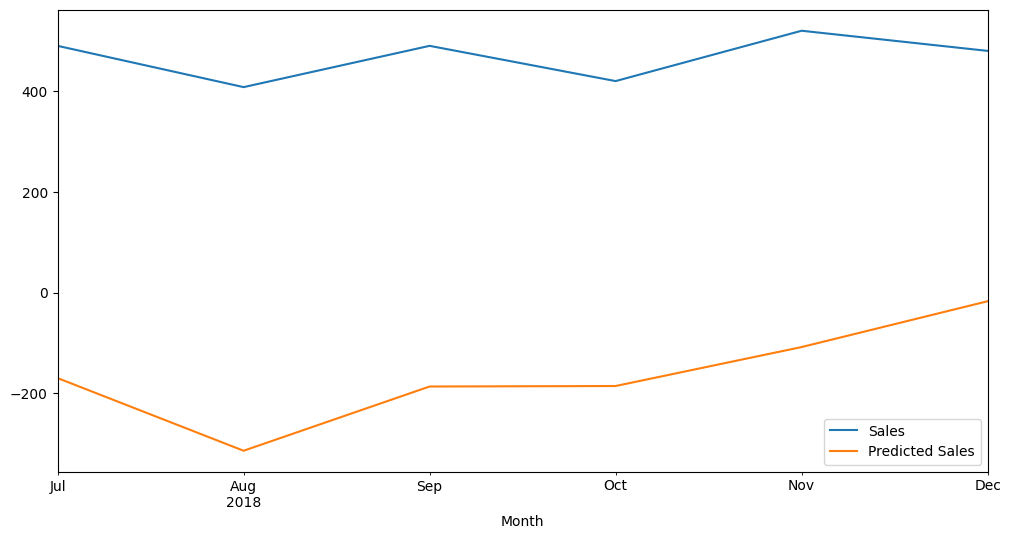

In [35]:
test.plot(figsize=(12,6))

Calculate the error between predicted and actual sales

In [36]:
def error_function(df, column_1, column_2):
  data = df.copy()
  my_list = []
  for i in range(len(df)):
    x = (df[column_2][i]*100)/df[column_1][i]
    if x >= 100:
      error = x - 100
      my_list.append(error)
    else:
      error = 100 - x
      my_list.append(error)
  data['error_percentage'] = my_list
  return data

In [39]:
column_1 = 'Sales'
column_2 = 'Predicted Sales'
df_new = error_function(test, column_1, column_2)

In [40]:
df_new.head()

,Sales,Predicted Sales,error_percentage
Month,,,
2018-07-31,490,-170.041962,134.702441
2018-08-31,408,-314.365356,177.050332
2018-09-30,490,-186.770721,138.116474
2018-10-31,420,-185.775009,144.232145
2018-11-30,520,-108.383255,120.842934


Find the average error

In [41]:
def mean_error(df, error_column):
  total = 0
  for i in range(len(df)):
    total = total + df[error_column][i]
  mean_error_ = total / (len(df))
  return mean_error_

In [42]:
error_rate = mean_error(df_new, 'error_percentage')

In [43]:
error_rate

136.42737361960877

Comparing the actual and predicted sales

In [44]:
sum_of_actual_sales = sum(df.Sales.values)

In [45]:
sum_of_actual_sales

10647

In [46]:
sum_of_predicted_sales = sum(df_new['Predicted Sales'].values)

In [47]:
sum_of_predicted_sales

-982.7118988037109

In [48]:
rate_of_actual_and_predict_sums = (sum_of_predicted_sales*100) / sum_of_actual_sales

In [49]:
if rate_of_actual_and_predict_sums >= 100 :
  error_percentage = rate_of_actual_and_predict_sums - 100
else:
  error_percentage = 100 - rate_of_actual_and_predict_sums

In [50]:
print('Percentage error: ', error_percentage)

Percentage error:  109.22994175639815
